In [1]:
import networkx as net
import urllib
import matplotlib.pyplot as plot
import numpy
from scipy.cluster import hierarchy
from scipy.spatial import distance
from collections import defaultdict

% matplotlib inline

In [2]:
testfile = urllib.URLopener()
testfile.retrieve("https://raw.githubusercontent.com/maksim2042/SNABook/master/chapter1/egypt_retweets.net", "egypt_retweets.net")

('egypt_retweets.net', <httplib.HTTPMessage instance at 0x7f6fdd94acf8>)

In [3]:
g=net.read_pajek('egypt_retweets.net')
g=net.Graph(g)

In [4]:
print(net.info(g))

Name: NetworkX
Type: Graph
Number of nodes: 25178
Number of edges: 32785
Average degree:   2.6043


In [5]:
len(sorted(net.connected_components(g), key=len,reverse=True))

3122

In [6]:
x = [len(c) for c in sorted(net.connected_components(g), key=len,reverse=False)]

(array([3.121e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.00000e+00, 1.77710e+03, 3.55320e+03, 5.32930e+03, 7.10540e+03,
        8.88150e+03, 1.06576e+04, 1.24337e+04, 1.42098e+04, 1.59859e+04,
        1.77620e+04]),
 <a list of 10 Patch objects>)

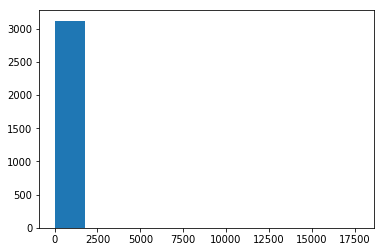

In [7]:
plot.hist(x)

In [8]:
[len(c) for c in sorted(net.connected_components(g), key=len,reverse=False) if len(c) > 10]

[11, 11, 13, 14, 16, 16, 64, 17762]

In [9]:
def trim_edges(g, weight=1):
    g2 = net.Graph()
    for f, to, edata in g.edges(data=True):
        if edata['weight'] > weight:
            g2.add_edge(f, to, weight=edata['weight'])
    return g2

In [10]:
def island_method(g, iterations=5):
    weights = [edata['weight'] for f, to, edata in g.edges(data=True)]
    mn=int(min(weights))
    mx=int(max(weights))
    step=int((mx-mn)/iterations)
    return [[threshold, trim_edges(g, threshold)] for threshold in range(mn, mx, step)]

In [11]:
cc=list(net.connected_component_subgraphs(g))[0]

In [12]:
island = island_method(cc)

In [13]:
for i in island:
    print i[0], len(i[1]), len(sorted(net.connected_components(i[1]), key=len,reverse=True))

1 12360 314
62 27 11
123 8 3
184 5 2
245 5 2


In [14]:
bieb = net.Graph(net.ego_graph(cc, 'justinbieber', radius=2))
print(net.info(bieb))

Name: NetworkX
Type: Graph
Number of nodes: 22
Number of edges: 30
Average degree:   2.7273


In [15]:
ghonim = net.Graph(net.ego_graph(cc, 'Ghonim', radius=2))
print(net.info(ghonim))

Name: NetworkX
Type: Graph
Number of nodes: 3450
Number of edges: 8260
Average degree:   4.7884


In [16]:
net.average_clustering(ghonim)

0.04332254475699303

In [17]:
testfile = urllib.URLopener()
testfile.retrieve("https://raw.githubusercontent.com/maksim2042/SNABook/master/chapter4/9_11_edgelist.txt", 
                  "9_11_edgelist.txt")

('9_11_edgelist.txt', <httplib.HTTPMessage instance at 0x7f6fd93a1ef0>)

In [18]:
testfile.retrieve("https://raw.githubusercontent.com/maksim2042/SNABook/master/chapter4/9_11_attrib.txt", 
                  "9_11_attrib.txt")

('9_11_attrib.txt', <httplib.HTTPMessage instance at 0x7f6fd93a2b00>)

In [19]:
import csv
in_file = csv.reader(open('9_11_edgelist.txt', 'rb'))

In [20]:
g = net.Graph()
for line in in_file:
    g.add_edge(line[0], line[1], weight=line[2], conf=line[3])

In [21]:
for n in g.nodes(): g.node[n]['flight'] = 'None'

In [22]:
attrib = csv.reader(open('9_11_attrib.txt', 'rb'))
for line in attrib:
    g.node[line[0]]['flight'] = line[1]

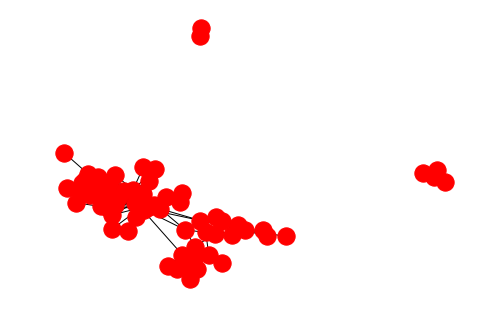

In [23]:
net.draw(g)

In [24]:
print(net.info(g))

Name: 
Type: Graph
Number of nodes: 69
Number of edges: 159
Average degree:   4.6087


In [25]:
components = net.connected_component_subgraphs(g)
cc = list(components)[0]

In [26]:
print(net.info(cc))

Name: 
Type: Graph
Number of nodes: 63
Number of edges: 154
Average degree:   4.8889


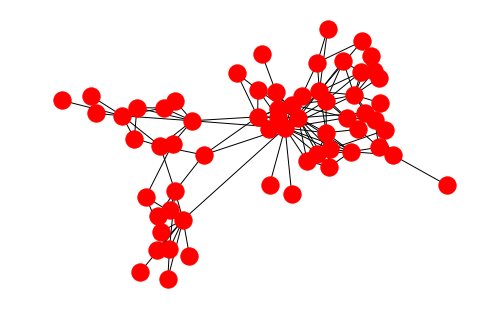

In [27]:
net.draw(cc)

In [28]:
from collections import defaultdict

In [29]:
def plot_multimode(m,layout=net.spring_layout, type_string='type', with_labels=True, filename_prefix='',output_type='pdf'):

    ## create a default color order and an empty color-map
    colors=['r','g','b','c','m','y','k']
    colormap={}
    d=net.degree(m)  #we use degree for sizing nodes
    pos=layout(m)  #compute layout 
    
    #Now we need to find groups of nodes that need to be colored differently
    nodesets=defaultdict(list)
    for n in m.nodes():
        try:
            t=m.node[n][type_string]
        except KeyError:
            ##this happens if a node doesn't have a type_string -- give it a None value
            t='None'
        nodesets[t].append(n)
        
    ## Draw each group of nodes separately, using its own color settings
    print "drawing nodes..."
    i=0
    for key in nodesets.keys():
        ns=[d[n]*100 for n in nodesets[key]]
        net.draw_networkx_nodes(m,pos,nodelist=nodesets[key], node_size=ns, node_color=colors[i], alpha=0.6)
        colormap[key]=colors[i]
        i+=1
        if i==len(colors): 
            i=0  ### wrap around the colormap if we run out of colors
    print colormap  
    
    ## Draw edges using a default drawing mechanism
    print "drawing edges..."
    net.draw_networkx_edges(m,pos,width=0.5,alpha=0.5)  
    
    print "drawing labels..."
    if with_labels: 
        net.draw_networkx_labels(m,pos,font_size=12)
    plot.axis('off')
    if filename_prefix is not '':
        plot.savefig(filename_prefix+'.'+output_type)
    

drawing nodes...
{'93_Penn': 'g', '175_WTC South': 'r', 'None': 'b', '77_Pentagon': 'm', '11_WTC North': 'c'}
drawing edges...
drawing labels...


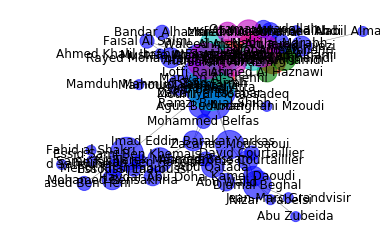

In [30]:
plot_multimode(cc, type_string='flight')

In [31]:
testfile = urllib.URLopener()
testfile.retrieve("https://raw.githubusercontent.com/maksim2042/SNABook/master/chapter4/triadic.py", 
                  "triadic.py")
testfile.retrieve("https://raw.githubusercontent.com/maksim2042/SNABook/master/chapter4/draw_triads.py", 
                  "draw_triads.py")

('draw_triads.py', <httplib.HTTPMessage instance at 0x7f6fd934a1b8>)

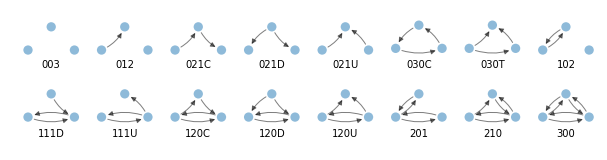

In [32]:
import triadic
import draw_triads

In [33]:
g = net.DiGraph(net.krackhardt_kite_graph())

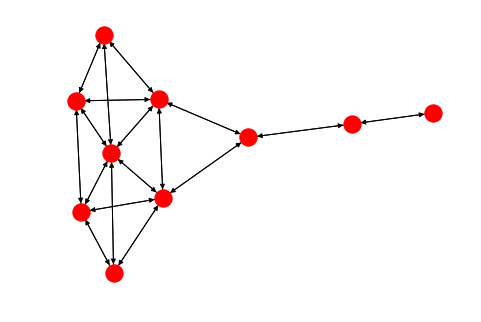

In [34]:
net.draw(g)

In [35]:
census, node_census = triadic.triadic_census(g)
census

{'003': 22,
 '012': 0,
 '021C': 0,
 '021D': 0,
 '021U': 0,
 '030C': 0,
 '030T': 0,
 '102': 63,
 '111D': 0,
 '111U': 0,
 '120C': 0,
 '120D': 0,
 '120U': 0,
 '201': 24,
 '210': 0,
 '300': 11}

In [36]:
keys = node_census.values()[1].keys()

In [37]:
print '| NODE |', ' | '.join(keys)
for k in node_census.keys():
    print '|', k, '|', ' | '.join([str(v) for v in node_census[k].values()])

| NODE | 201 | 021C | 021D | 210 | 120U | 030C | 003 | 300 | 012 | 021U | 120D | 102 | 111U | 030T | 120C | 111D
| 0 | 8 | 0 | 0 | 0 | 0 | 0 | 0 | 4 | 0 | 0 | 0 | 14 | 0 | 0 | 0 | 0
| 1 | 4 | 0 | 0 | 0 | 0 | 0 | 0 | 3 | 0 | 0 | 0 | 11 | 0 | 0 | 0 | 0
| 2 | 4 | 0 | 0 | 0 | 0 | 0 | 0 | 1 | 0 | 0 | 0 | 7 | 0 | 0 | 0 | 0
| 3 | 3 | 0 | 0 | 0 | 0 | 0 | 0 | 2 | 0 | 0 | 0 | 7 | 0 | 0 | 0 | 0
| 4 | 2 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 4 | 0 | 0 | 0 | 0
| 5 | 1 | 0 | 0 | 0 | 0 | 0 | 0 | 1 | 0 | 0 | 0 | 5 | 0 | 0 | 0 | 0
| 6 | 1 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 3 | 0 | 0 | 0 | 0
| 7 | 1 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 5 | 0 | 0 | 0 | 0
| 8 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 7 | 0 | 0 | 0 | 0
| 9 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0


In [38]:
census, node_census = triadic.triadic_census(cc)

In [39]:
census

{'003': 31288,
 '012': 0,
 '021C': 0,
 '021D': 0,
 '021U': 0,
 '030C': 0,
 '030T': 0,
 '102': 7585,
 '111D': 0,
 '111U': 0,
 '120C': 0,
 '120D': 0,
 '120U': 0,
 '201': 705,
 '210': 0,
 '300': 133}

In [40]:
closed_triads = [[-k, v] for k,v in sorted([[-node_census[k]['300'], k] for k in node_census.keys()])]

In [41]:
closed_triads

[[20, 'Abdul Aziz Al-Omari'],
 [17, 'Mohamed Atta'],
 [12, 'Ramzi Bin al-Shibh'],
 [8, 'Waleed Alshehri'],
 [7, 'Agus Budiman'],
 [6, 'Djamal Beghal'],
 [6, 'Khalid Al-Mihdhar'],
 [6, 'Mounir El Motassadeq '],
 [6, 'Salem Alhazmi'],
 [6, 'Wail Alshehri'],
 [4, 'Marwan Al-Shehhi'],
 [4, 'Satam Suqami'],
 [4, 'Tarek Maaroufi'],
 [3, 'Abdussattar Shaikh'],
 [3, 'Ahmed Alnami'],
 [3, 'Lotfi Raissi'],
 [3, 'Rayed Mohammed Abdullah'],
 [3, 'Saeed Alghamdi'],
 [2, 'Mehdi Khammoun'],
 [1, 'Ahmed Al Haznawi'],
 [1, 'Ahmed Alghamdi'],
 [1, 'David Courtaillier'],
 [1, 'Fayez Ahmed'],
 [1, 'Jerome Courtaillier'],
 [1, 'Lased Ben Heni'],
 [1, 'Majed Moqed'],
 [1, 'Mamoun Darkazanli'],
 [1, 'Osama Awadallah'],
 [1, 'Said Bahaji'],
 [0, 'Abdelghani Mzoudi'],
 [0, 'Abu Qatada'],
 [0, 'Abu Walid'],
 [0, 'Abu Zubeida'],
 [0, 'Ahmed Khalil Ibrahim Samir Al-Ani'],
 [0, 'Ahmed Ressam'],
 [0, 'Bandar Alhazmi'],
 [0, 'Essid Sami Ben Khemais'],
 [0, 'Essoussi Laaroussi'],
 [0, 'Fahid al Shakri'],
 [0, 'Faisal

In [42]:
testfile = urllib.URLopener()
testfile.retrieve("https://raw.githubusercontent.com/maksim2042/SNABook/master/chapter4/economic.net", 
                  "economic.net")

('economic.net', <httplib.HTTPMessage instance at 0x7f6fd41cecf8>)

In [43]:
eco=net.read_pajek('economic.net')
eco = net.Graph(eco)
print(net.info(eco))

Name: 
Type: Graph
Number of nodes: 14
Number of edges: 47
Average degree:   6.7143


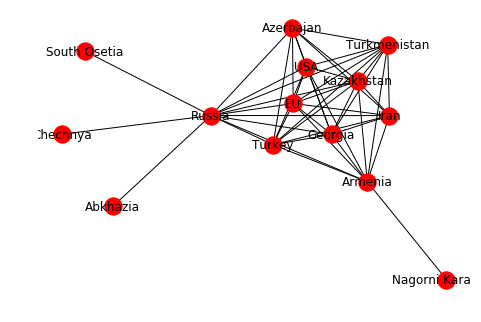

In [44]:
net.draw(eco, with_labels=True)

In [45]:
e2 = trim_edges(eco, weight=0.5)

In [46]:
cliques = list(net.find_cliques(e2))
cliques

[[u'South Osetia', u'Russia'],
 [u'Chechnya', u'Russia'],
 [u'EU', u'Turkey'],
 [u'EU', u'Georgia'],
 [u'EU', u'Azerbajan'],
 [u'EU', u'USA'],
 [u'EU', u'Armenia'],
 [u'Nagorni Karabakh', u'Armenia'],
 [u'Kazakhstan', u'Russia'],
 [u'Kazakhstan', u'USA'],
 [u'Russia', u'Turkey'],
 [u'Russia', u'Abkhazia']]

In [47]:
def create_hc(G):
    """Creates hierarchical cluster of graph G from distance matrix"""
    labels=list(G.nodes())
    path_length = net.all_pairs_shortest_path_length(G)
    distances = numpy.zeros((len(G), len(G)))
    i=0   
    for u,p in path_length:
        j=0
        for v,d in p.items():
            distances[i][j]=d
            distances[j][i]=d
            if i==j: distances[i][j]=0
            j+=1
        i+=1
    # Create hierarchical cluster
    Y = distance.squareform(distances)
    Z = hierarchy.complete(Y)  # Creates HC using farthest point linkage
    # This partition selection is arbitrary, for illustrive purposes
    membership = list(hierarchy.fcluster(Z, t=1.15))
    # Create collection of lists for blockmodel
    partition = defaultdict(list)
    for n, p in zip(list(range(len(G))), membership):
        partition[p].append(labels[n])
    return list(partition.values())

In [48]:
clusters = create_hc(eco)
clusters

[[u'Armenia', u'Nagorni Karabakh'],
 [u'South Osetia', u'Russia'],
 [u'Chechnya', u'USA', u'Turkmenistan'],
 [u'Turkey', u'Georgia', u'Iran', u'Azerbajan', u'EU', u'Kazakhstan'],
 [u'Abkhazia']]

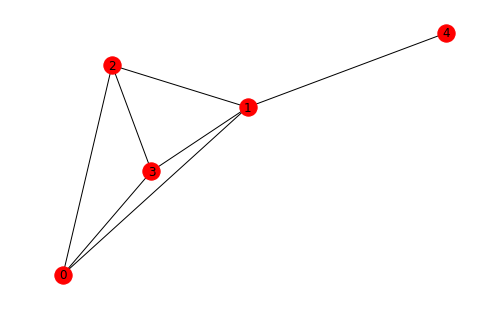

In [49]:
BM = net.quotient_graph(eco, clusters, relabel=True)
net.draw(BM, with_labels=True)

In [50]:
print(net.info(BM))

Name: 
Type: Graph
Number of nodes: 5
Number of edges: 7
Average degree:   2.8000
